# TRABAJO FINAL - Sales Forecasting Model
- Autor: Paolo Rossi Gonzales
- E-mail: paolo.rossi@pucp.edu.pe
- LinkedIn: https://www.linkedin.com/in/manuel-paolo-rossi-gonzales/

## Cargando el dataset y librerías a usar

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [101]:
df = pd.read_csv('SalesDemand.csv', sep=';')
df

,date,store,item,sales
0,1/01/2013,1.0,1.0,13.0
1,2/01/2013,1.0,1.0,11.0
2,3/01/2013,1.0,1.0,14.0
3,4/01/2013,1.0,1.0,13.0
4,5/01/2013,1.0,1.0,10.0
...,...,...,...,...
957995,NaN,NaN,NaN,NaN
957996,NaN,NaN,NaN,NaN
957997,NaN,NaN,NaN,NaN
957998,NaN,NaN,NaN,NaN


Revisaremos si hay valores nulos para eliminar

In [102]:
df.isna().sum()

date     45000
store    45000
item     45000
sales    45000
dtype: int64

In [103]:
df.dropna(inplace=True)
df

,date,store,item,sales
0,1/01/2013,1.0,1.0,13.0
1,2/01/2013,1.0,1.0,11.0
2,3/01/2013,1.0,1.0,14.0
3,4/01/2013,1.0,1.0,13.0
4,5/01/2013,1.0,1.0,10.0
...,...,...,...,...
912995,27/12/2017,10.0,50.0,63.0
912996,28/12/2017,10.0,50.0,59.0
912997,29/12/2017,10.0,50.0,74.0
912998,30/12/2017,10.0,50.0,62.0


Revisaremos los tipos de variables

In [104]:
df.dtypes

date      object
store    float64
item     float64
sales    float64
dtype: object

In [105]:
df['date'] = pd.to_datetime(df['date'],dayfirst=True)

In [106]:
df.dtypes

date     datetime64[ns]
store           float64
item            float64
sales           float64
dtype: object

Exploramos el Dataset:

In [107]:
df.describe()

,store,item,sales
count,913000.000000,913000.000000,913000.000000
mean,5.500000,25.500000,52.250287
std,2.872283,14.430878,28.801144
min,1.000000,1.000000,0.000000
25%,3.000000,13.000000,30.000000
50%,5.500000,25.500000,47.000000
75%,8.000000,38.000000,70.000000
max,10.000000,50.000000,231.000000


In [108]:
def plot_sales(store,item):
    # Plot the sales by item (max:50) and by store (max:10)
    
    df1_1 = df[(df['store'] == store) & (df['item'] == item)]
    plt.figure(figsize = (16,5), dpi = 100)
    plt.plot(df1_1.date, df1_1.sales, color = 'blue')
    plt.title('Ventas del Item 1 en el Store 1')
    plt.show()

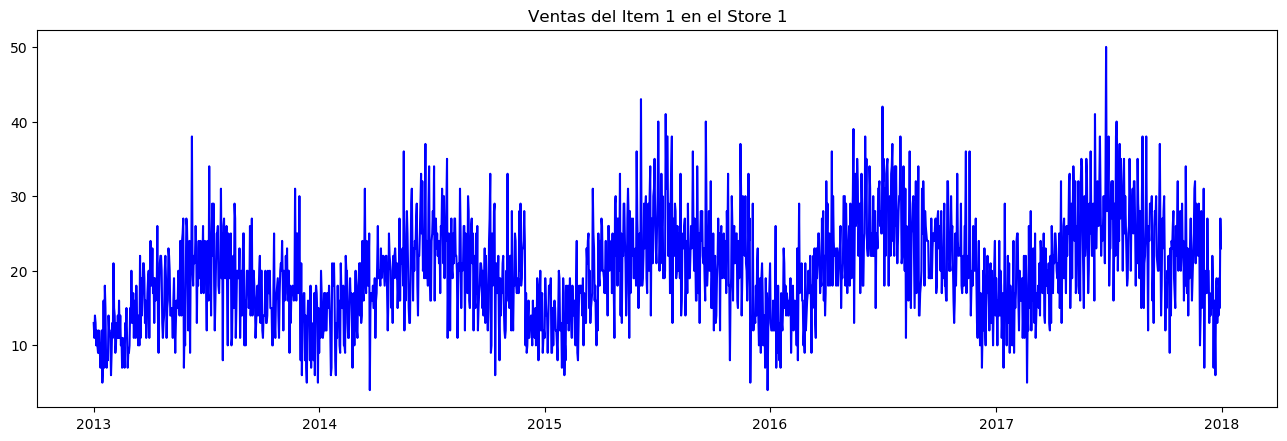

In [109]:
plot_sales(1,1)

In [110]:
df_All_Items = df.pivot_table(index='date',columns='store',values='sales',aggfunc='sum')
df_All_Items

store,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
date,,,,,,,,,,
2013-01-01,1316.0,1742.0,1588.0,1423.0,1032.0,1099.0,964.0,1628.0,1383.0,1521.0
2013-01-02,1264.0,1808.0,1538.0,1432.0,997.0,1023.0,944.0,1687.0,1455.0,1530.0
2013-01-03,1305.0,1887.0,1635.0,1534.0,1130.0,1149.0,966.0,1736.0,1492.0,1654.0
2013-01-04,1452.0,1983.0,1741.0,1685.0,1258.0,1201.0,1040.0,1966.0,1612.0,1739.0
2013-01-05,1499.0,2087.0,1887.0,1649.0,1154.0,1286.0,1131.0,2005.0,1698.0,1841.0
...,...,...,...,...,...,...,...,...,...,...
2017-12-27,1837.0,2624.0,2365.0,2176.0,1552.0,1560.0,1471.0,2468.0,2104.0,2221.0
2017-12-28,1951.0,2839.0,2479.0,2306.0,1696.0,1707.0,1509.0,2660.0,2309.0,2429.0
2017-12-29,2116.0,3025.0,2646.0,2460.0,1774.0,1737.0,1689.0,2923.0,2478.0,2687.0


In [111]:
def plot_sales_by_Store(store):
    # Plot sales of the 10 stores
    
    plt.figure(figsize = (16,5), dpi = 100)
    plt.plot(df_All_Items.index,df_All_Items.loc[:,store])
    plt.title(f'Ventas Agregadas del Store {store}')
    plt.show()

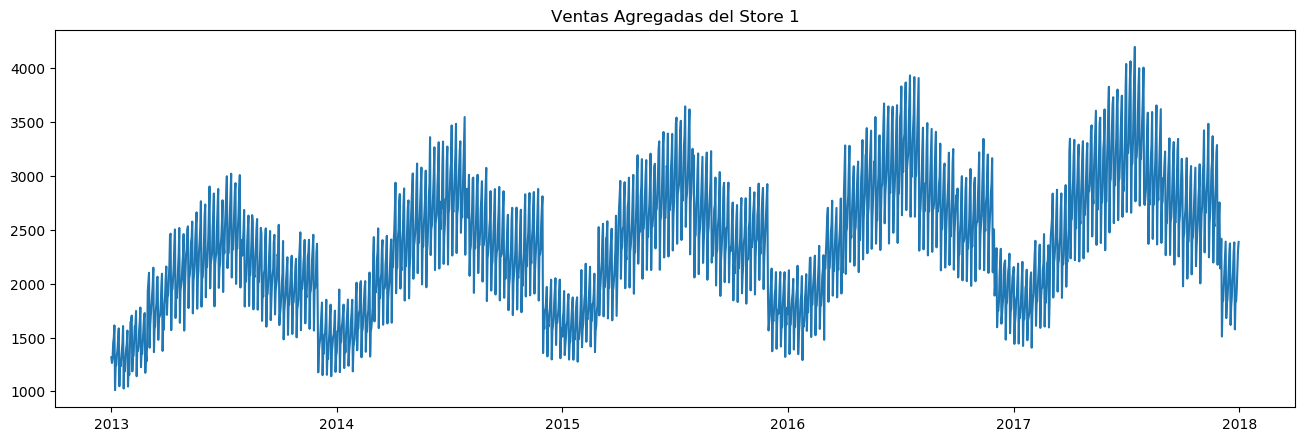

In [112]:
plot_sales_by_Store(1)

Al analizar la serie visualmente, notamos que:
- existe mucha variabilidad (ruido) debido a que estamos trabajando con una base de venta diaria.
- se evidencia un mismo comportamiento (en cuanto a estacionalidad y tendencia) en cuanto a las series de los distintos artículos y de las distintas tiendas, la diferencia se dá en el nivel de ventas.

En ese sentido, es necesario crear bases mensuales agregadas a nivel de tiendas.

## Creamos las tablas agregadas

In [113]:
df_diario = df
df_diario = df.groupby(by=[df['date']]).sum().reset_index()
df_diario.drop(columns=['store','item'],inplace=True)
df_diario.set_index('date',inplace=True)
df_diario.head()

,sales
date,
2013-01-01,13696.0
2013-01-02,13678.0
2013-01-03,14488.0
2013-01-04,15677.0
2013-01-05,16237.0


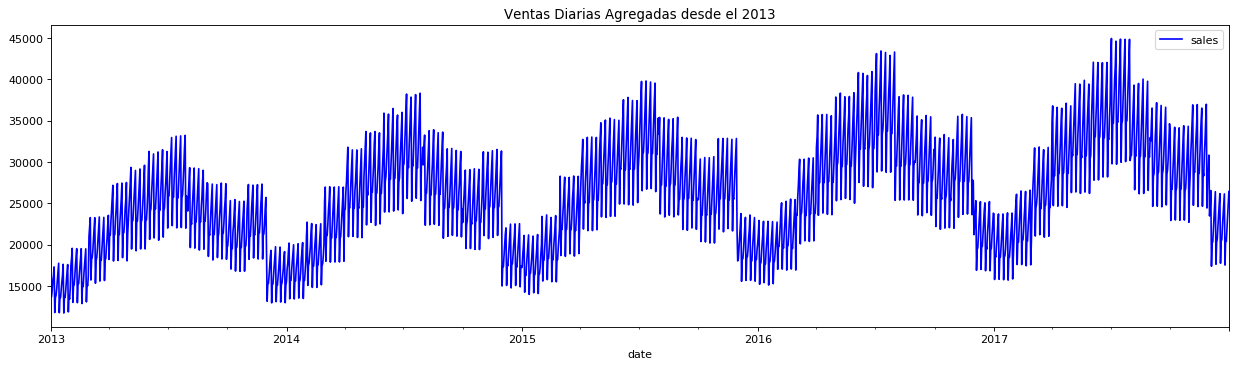

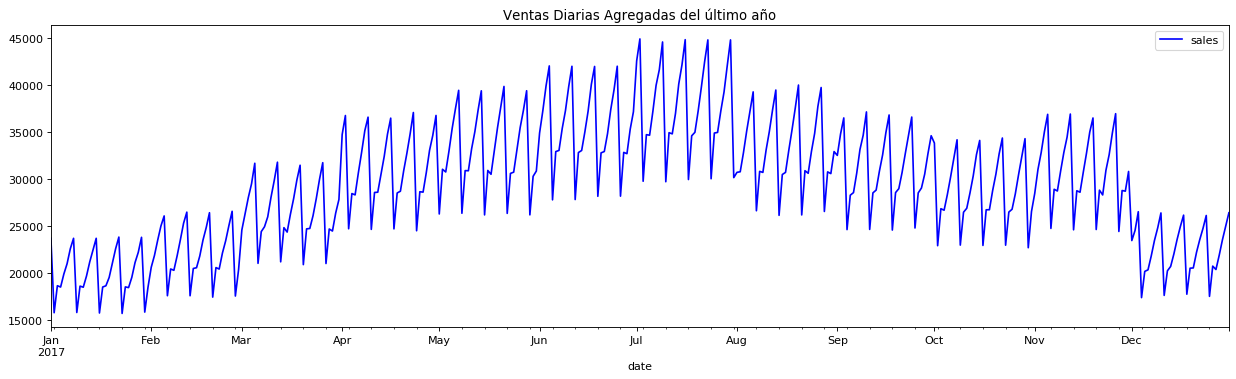

In [114]:
df_diario.loc['2013-01-01':].plot(figsize=(19,5),color='b')
plt.title('Ventas Diarias Agregadas desde el 2013')
df_diario.loc['2017-01-01':].plot(figsize=(19,5),color='b')
plt.title('Ventas Diarias Agregadas del último año')
plt.show()

In [115]:
df_mensual = df_diario.resample(rule='MS').sum()
df_mensual.head()

,sales
date,
2013-01-01,454904.0
2013-02-01,459417.0
2013-03-01,617382.0
2013-04-01,682274.0
2013-05-01,763242.0


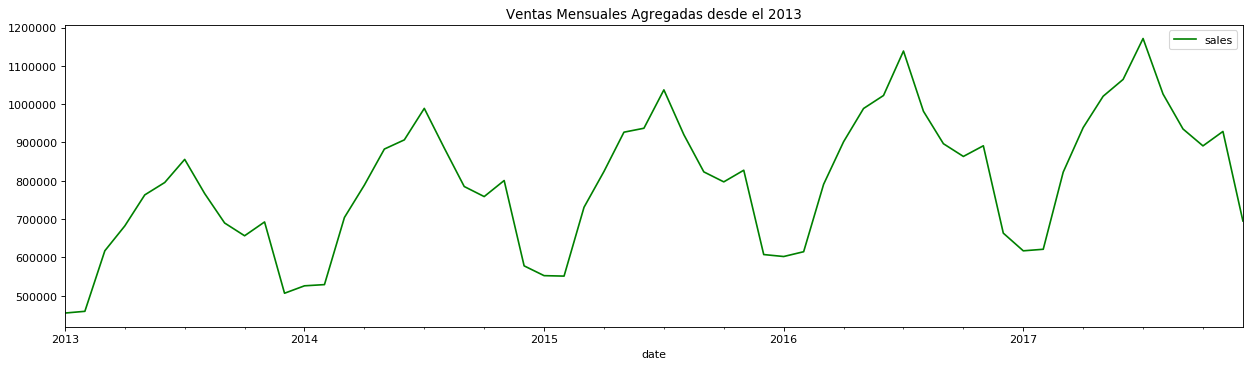

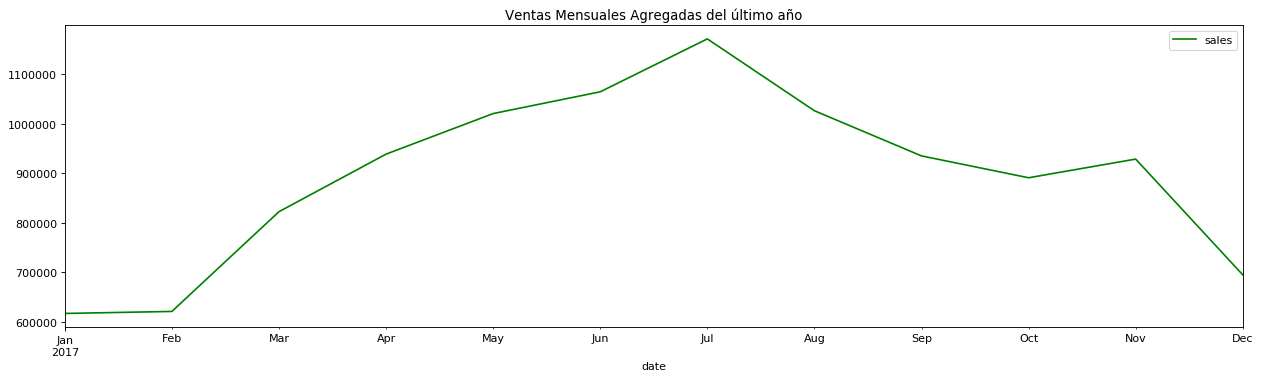

In [116]:
df_mensual.loc['2013-01-01':].plot(figsize=(19,5),color='g')
plt.title('Ventas Mensuales Agregadas desde el 2013')
df_mensual.loc['2017-01-01':].plot(figsize=(19,5),color='g')
plt.title('Ventas Mensuales Agregadas del último año')
plt.show()

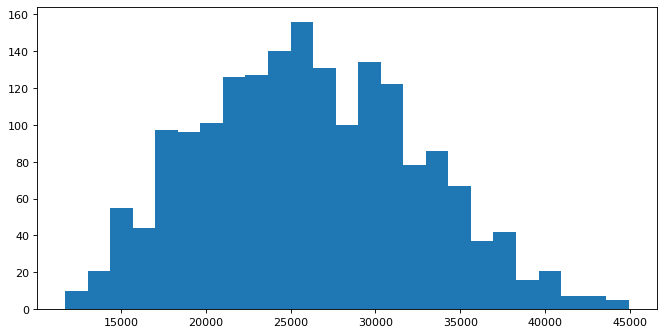

In [117]:
# Análisis gráfico
plt.hist(df_diario.sales, bins = 25)
plt.show()

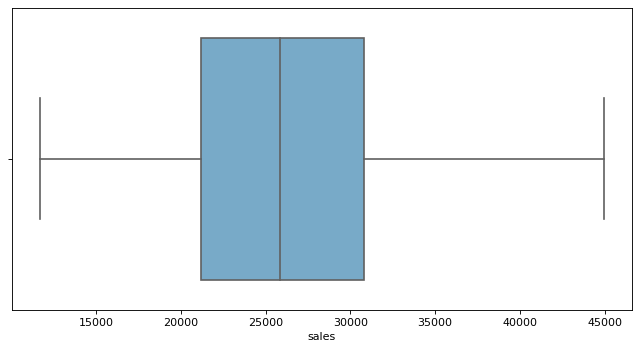

In [118]:
sns.boxplot(x = df_diario.sales, palette = 'Blues')
plt.show()

In [119]:
# Validando test de tuckey
# Función de Identificar Outliers (Tuckey):
def calcularOutliars(x):
  Q01 = x.quantile(0.25)
  Q03 = x.quantile(0.75)
  IQR = Q03 - Q01
  a = (x < (Q01 - 1.5 * IQR)) | (x > (Q03 + 1.5 * IQR))
  numOutliars = a[a == True].shape[0]
  pornumOutliars = numOutliars/x.shape[0]
  return pornumOutliars

In [120]:
calcularOutliars(df_diario.sales)

0.0

## Descomposición de la serie agregada

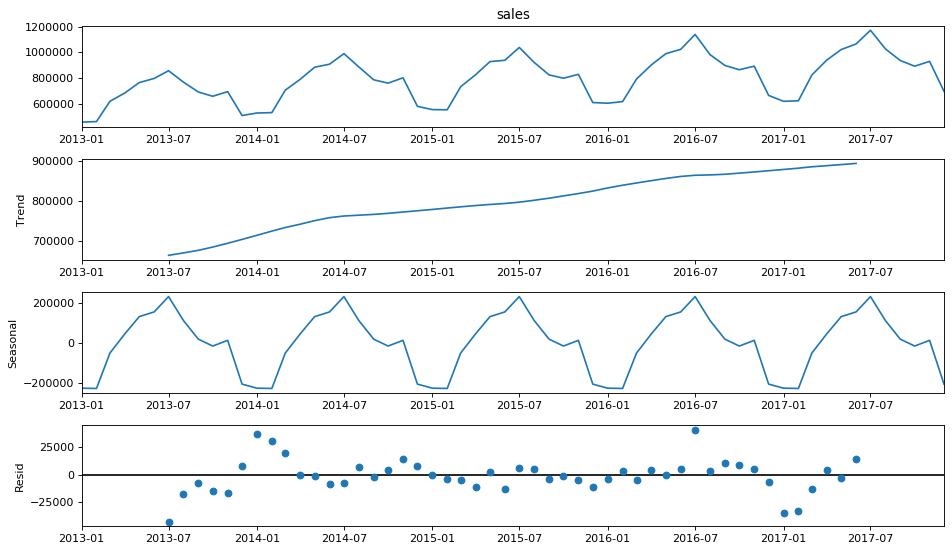

In [121]:
from statsmodels.tsa.seasonal import seasonal_decompose
plt.rcParams.update({'figure.figsize': (12, 7), 'figure.dpi': 80})

result = seasonal_decompose(df_mensual['sales'],model = 'additive',freq = 12)
result.plot()
plt.show()

**Análisis de Residuales**

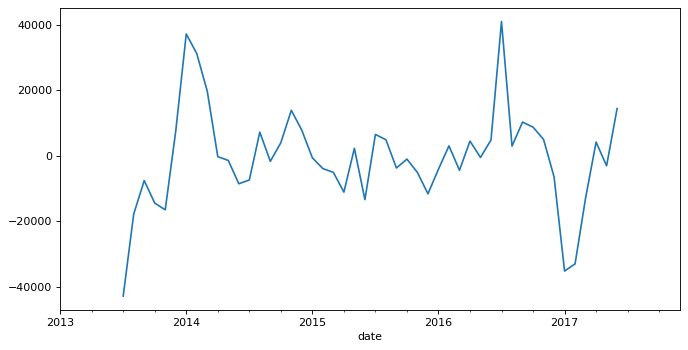

In [122]:
plt.rcParams.update({'figure.figsize': (10, 5), 'figure.dpi': 80})
result.resid.plot()

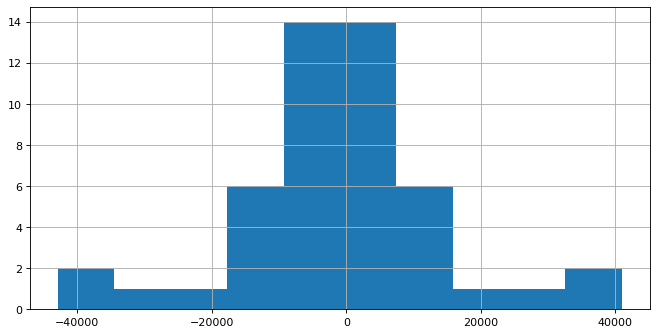

In [123]:
result.resid.hist()

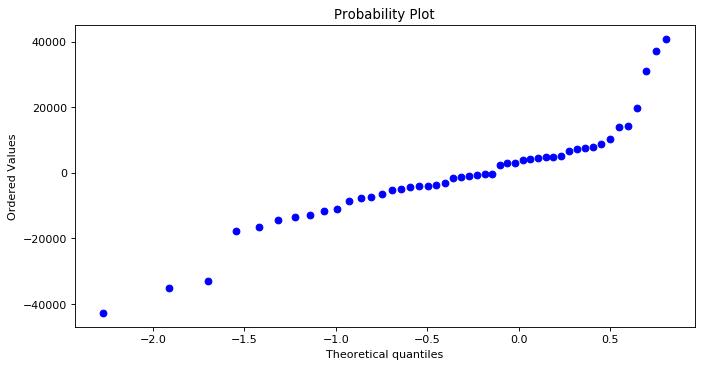

In [124]:
import scipy.stats as stats
import pylab
stats.probplot(result.resid,dist = 'norm', plot = pylab);

In [125]:
stats.kstest(result.resid.dropna(),'norm')

KstestResult(statistic=0.5625, pvalue=7.484536492246506e-15)

**Test de Raíces Unitarias**

In [126]:
from statsmodels.tsa.stattools import adfuller, kpss

In [127]:
# ADF Test
adf = adfuller(df_mensual.sales, autolag='AIC')
print('ADF Statistic: %f' % adf[0])
print('p-value: %f' % adf[1])

ADF Statistic: -5.247519
p-value: 0.000007


In [128]:
# KPSS Test
kp = kpss(df_mensual.sales, regression='c')
print('p_value:',kp[1])
print('\nKPSS Statistic: %f' % kp[0])
print('p-value: %f' % kp[1])

p_value: 0.019864741024511565

KPSS Statistic: 0.630488
p-value: 0.019865


## Train / Test Split

In [129]:
from sklearn.model_selection import TimeSeriesSplit

In [130]:
df_mensual.shape[0]/13

4.615384615384615

In [131]:
tss = TimeSeriesSplit(n_splits=4)

In [132]:
X = df_mensual.drop(labels=['sales'], axis=1)
y = df_mensual['sales']

In [133]:
for train_index, test_index in tss.split(X):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [134]:
X_train.shape, X_test.shape

((48, 0), (12, 0))

In [135]:
y_train.shape, y_test.shape

((48,), (12,))

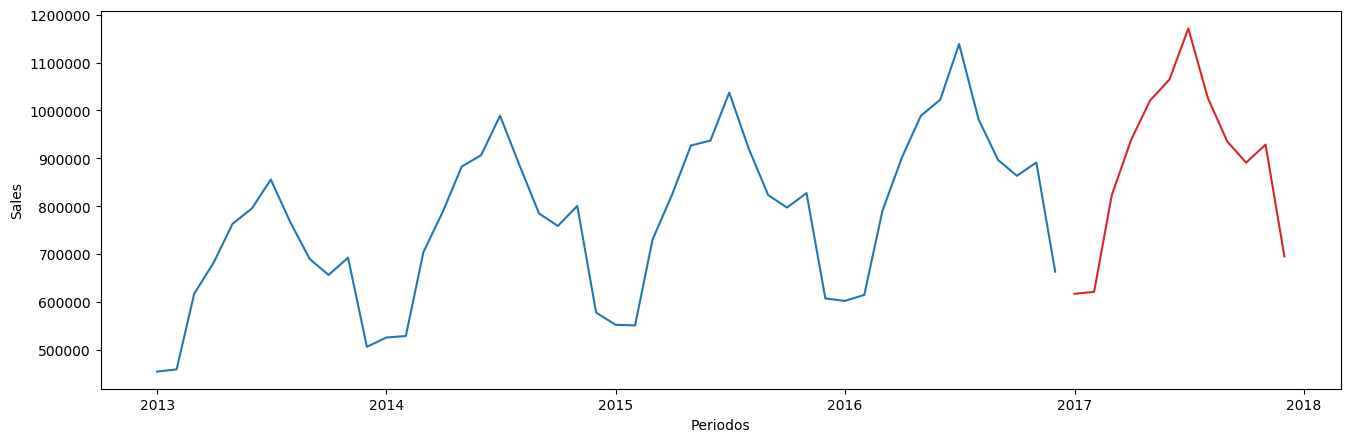

In [136]:
# Graficamos los periodos train y test
plt.figure(figsize=(16,5), dpi=100)
plt.plot(pd.DataFrame(y_train).index, pd.DataFrame(y_train).sales,color='tab:blue')
plt.plot(pd.DataFrame(y_test).index, pd.DataFrame(y_test).sales,color='tab:red')
plt.xlabel('Periodos')
plt.ylabel('Sales')
plt.show()

## Modelos de pronósticos 

In [137]:
from statsmodels.tsa.api import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX

**Modelo de Suavización Exponencial Triple**

In [138]:
# Creamos el modelo de Holt-Winters
model_shw = ExponentialSmoothing(y_train, seasonal_periods=12, trend='add', seasonal='add')
results_shw = model_shw.fit(use_boxcox = True)
forecast_shw = results_shw.forecast(12).rename("Forecast Holt-Winters")

In [139]:
print(results_shw.summary())

ExponentialSmoothing Model Results                       
Dep. Variable:                    endog   No. Observations:                   48
Model:             ExponentialSmoothing   SSE                    15200492470.295
Optimized:                         True   AIC                            971.523
Trend:                         Additive   BIC                           1001.462
Seasonal:                      Additive   AICC                           995.109
Seasonal Periods:                    12   Date:                 Wed, 09 Sep 2020
Box-Cox:                           True   Time:                         23:01:33
Box-Cox Coeff.:                 1.04177                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.7368421                alpha                 True
smoothing_slope               0.7368421         

In [140]:
#Calculamos el ECM
error = mean_squared_error(y_test, forecast_shw)
print('Test MSE: %.4f' % error)

Test MSE: 27254945787.3354


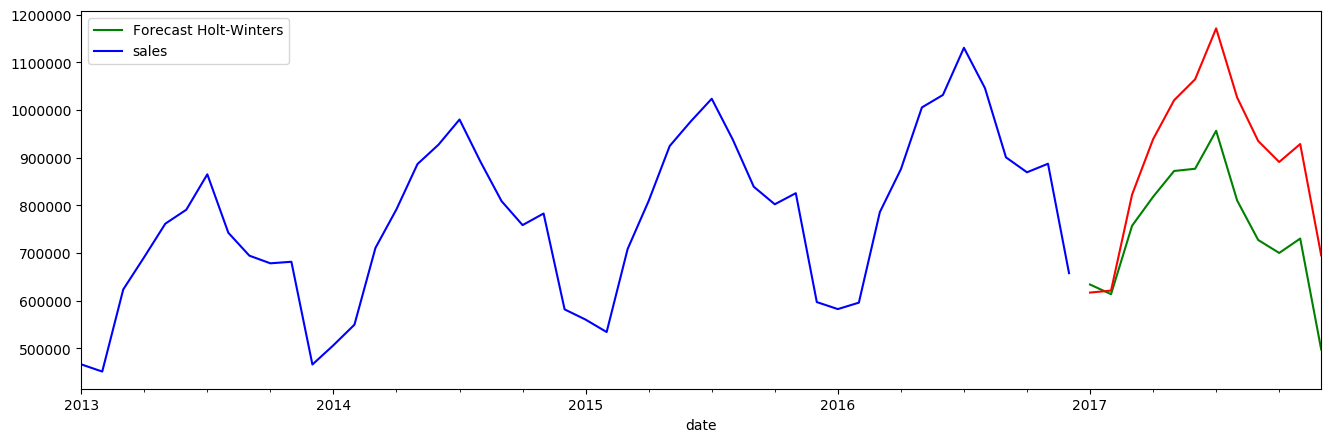

In [141]:
plt.figure(figsize=(16,5), dpi=100)
forecast_shw.plot(color='green',legend = True)
results_shw.fittedvalues.plot(color='blue')
y_test.plot(color='red',legend = True)
plt.show()

**ACF y PACF**

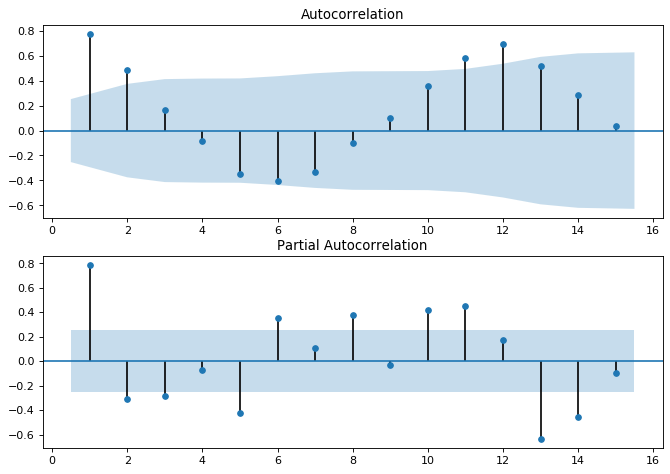

In [142]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(10,7))

plot_acf(df_mensual, lags = 15, zero = False, ax = ax1)
plot_pacf(df_mensual, lags = 15, zero = False, ax = ax2)
plt.show()

**ARIMA**

In [143]:
model_arima = SARIMAX(y_train, order = (4,1,4))

In [144]:
results_arima = model_arima.fit()

In [145]:
print(results_arima.summary())

SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                   48
Model:               SARIMAX(4, 1, 4)   Log Likelihood                -593.497
Date:                Wed, 09 Sep 2020   AIC                           1204.994
Time:                        23:01:34   BIC                           1221.645
Sample:                    01-01-2013   HQIC                          1211.260
                         - 12-01-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2052      0.422      0.487      0.627      -0.621       1.032
ar.L2          1.1790      0.297      3.976      0.000       0.598       1.760
ar.L3         -0.5706      0.332     -1.720      0.085      -1.221       0.080
ar.L

In [146]:
# Predecimos valores futuros
forecast_arima = results_arima.get_forecast(steps = 12).predicted_mean.rename('forecast arima')
forecast_arima

2017-01-01    620955.269282
2017-02-01    582415.175274
2017-03-01    638576.086698
2017-04-01    654543.351528
2017-05-01    769238.921165
2017-06-01    800625.642937
2017-07-01    902479.643261
2017-08-01    886211.203493
2017-09-01    922344.470665
2017-10-01    835300.657847
2017-11-01    813637.005839
2017-12-01    694841.886775
Freq: MS, Name: forecast arima, dtype: float64

In [147]:
# reasignamos index
y_test.index = forecast_arima.index
y_test

2017-01-01     617306.0
2017-02-01     621369.0
2017-03-01     822667.0
2017-04-01     938862.0
2017-05-01    1020686.0
2017-06-01    1064624.0
2017-07-01    1171393.0
2017-08-01    1026403.0
2017-09-01     935263.0
2017-10-01     891160.0
2017-11-01     928837.0
2017-12-01     695170.0
Freq: MS, Name: sales, dtype: float64

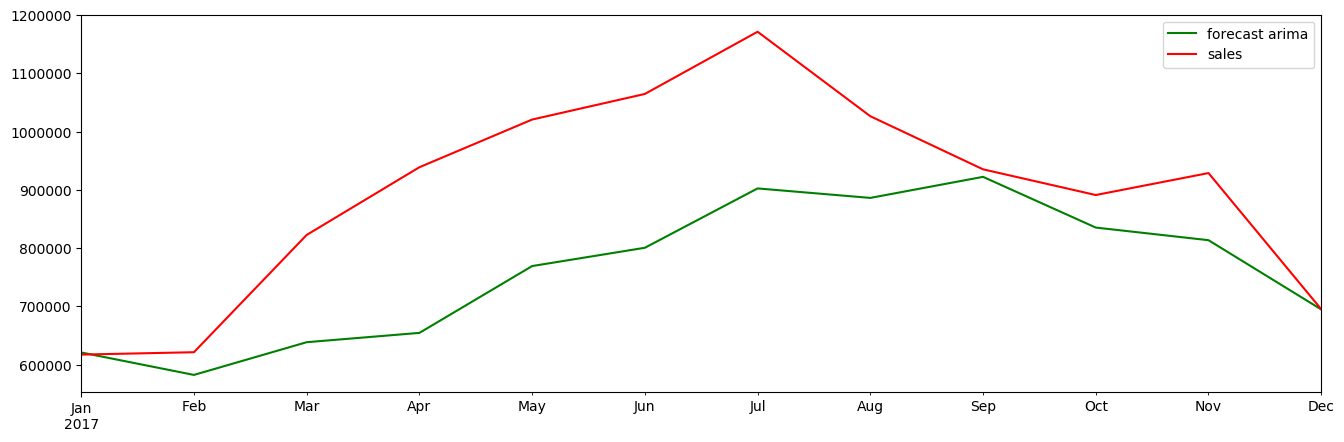

In [148]:
plt.figure(figsize=(16,5), dpi=100)
forecast_arima.plot(color = 'green', legend = True)
y_test.plot(color='red',legend = True)
plt.show()

In [149]:
#Calculamos el ECM
error = mean_squared_error(y_test, forecast_arima)
print('Test MSE: %.4f' % error)

Test MSE: 29808706325.1758


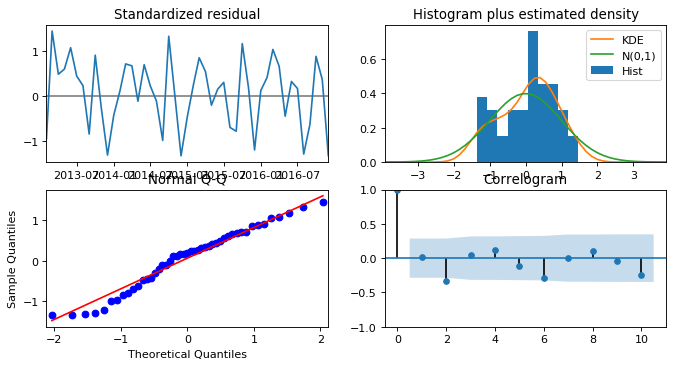

In [150]:
# Plot residuals
results_arima.plot_diagnostics()
plt.show()

**AUTO ARIMA**

In [151]:
import pmdarima as pm

In [152]:
model_auto = pm.auto_arima(y_train, seasonal=True, m = 12, D = 1)

In [153]:
results = model_auto.fit(y_train)

In [154]:
forecast_autoarima = model_auto.predict(n_periods=12)
forecast_autoarima

array([ 657737.05843029,  671800.17913496,  845831.53296994,
        957897.98959996, 1042209.39313012, 1078484.51127345,
       1195040.46471855, 1035289.6981808 ,  951939.75095091,
        918591.42186826,  946430.49425411,  718728.7455661 ])

In [155]:
print(results.summary())

SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                   48
Model:             SARIMAX(1, 0, 2)x(1, 1, [1], 12)   Log Likelihood                -389.334
Date:                              Wed, 09 Sep 2020   AIC                            792.668
Time:                                      23:01:51   BIC                            803.753
Sample:                                           0   HQIC                           796.537
                                               - 48                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.084e+04    3.5e+04      0.310      0.757   -5.77e+04    7.94e+04
ar.L1          0.8692      0.438      1.984      0.047   

In [156]:
forecast_autoarima = pd.DataFrame(forecast_autoarima)
forecast_autoarima.index = y_test.index
forecast_autoarima.columns = ['forecast']
forecast_autoarima.head()

,forecast
2017-01-01,6.577371e+05
2017-02-01,6.718002e+05
2017-03-01,8.458315e+05
2017-04-01,9.578980e+05
2017-05-01,1.042209e+06


<Figure size 1600x500 with 0 Axes>

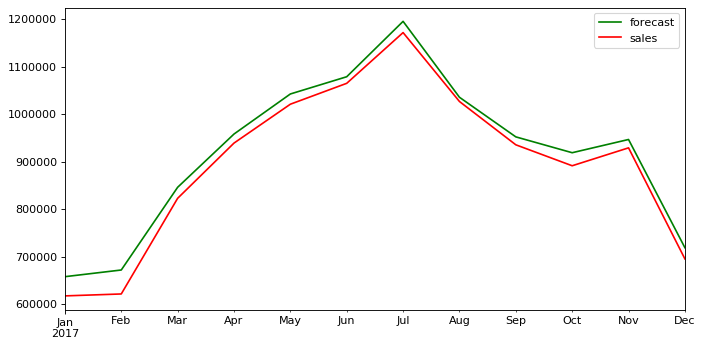

In [157]:
plt.figure(figsize=(16,5), dpi=100)
forecast_autoarima.plot(color = 'green', legend = True)
y_test.plot(color='red',legend = True)
plt.show()

In [158]:
#Calculamos el ECM
error = mean_squared_error(y_test, forecast_autoarima)
print('Test MSE: %.4f' % error)

Test MSE: 688802289.9982


Comparando los tres modelos desarrollados anteriormente podemos concluir que:
- El modelo SARIMA (1,0,2)x(1,1,1,12) presenta un mejor ajuste con la data de testeo, evidenciado tanto en el análisis gráfico como en los indicadores de ECM y AIC (menor valor a comparación de los otros modelos). Esto concuerda con nuestro análisis, ya que se indentificaron los componentes de tendencia y estacionalidad que presentaba la serie agregada (total tiendas y total items).

- El segundo modelo de mayor ajuste es el de Holt_Winters al analizar con los mismos criterios especificados en el punto anterior.

- Debido a que el pronóstico se realizó de manera agregada, es decir, al totalizar las ventas de las 10 tiendas y de los 50 artículos por tienda; se recomienda desagregar el pronóstico teniendo en cuenta la participación de cada tienda en el volumen total de ventas, ya que se evidenció que la data presenta un comportamiento similar en tendencia y estacionalidad para todos sus productos en todas sus tiendas.

## Pronósticos 

In [159]:
# model sarimax
model_sarimax = SARIMAX(df_mensual.sales, order= (1,0,2), seasonal_order=(1,1,1,12),
                       enforce_stationarity=False,
                      enforce_invertibility=False)

In [160]:
results_sarimax = model_sarimax.fit()

In [161]:
# Pronósticos de las ventas mensuales totales
forecast_sarimax = results_sarimax.get_forecast(steps = 12).predicted_mean.rename('forecast sarimax')
forecast_sarimax

2018-01-01    6.362451e+05
2018-02-01    6.378794e+05
2018-03-01    8.444966e+05
2018-04-01    9.611083e+05
2018-05-01    1.040931e+06
2018-06-01    1.086577e+06
2018-07-01    1.190377e+06
2018-08-01    1.047726e+06
2018-09-01    9.543844e+05
2018-10-01    9.070321e+05
2018-11-01    9.465789e+05
2018-12-01    7.110216e+05
Freq: MS, Name: forecast sarimax, dtype: float64

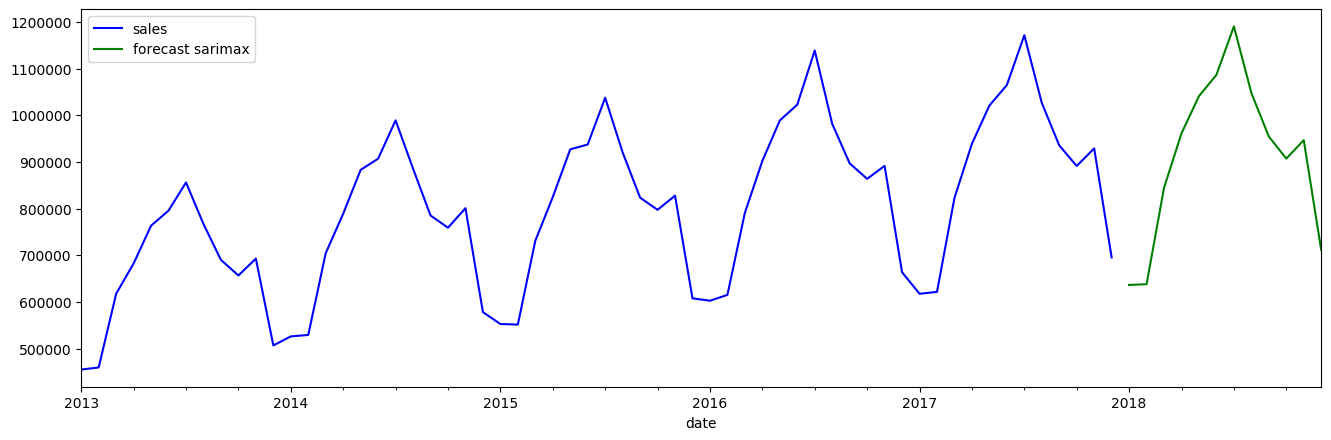

In [162]:
history = df_mensual.sales
plt.figure(figsize=(16,5), dpi=100)
history.plot(color = 'blue', legend = True)
forecast_sarimax.plot(color = 'green', legend = True)
plt.show()

# Pronosticando ventas diarias

In [163]:
df_diario.shape[0]/31

58.903225806451616

In [164]:
tss2 = TimeSeriesSplit(n_splits=58)

In [165]:
X = df_diario.drop(labels=['sales'], axis=1)
y = df_diario['sales']

In [166]:
for train_index, test_index in tss2.split(X):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [167]:
X_train.shape, X_test.shape

((1796, 0), (30, 0))

In [168]:
y_train.shape, y_test.shape

((1796,), (30,))

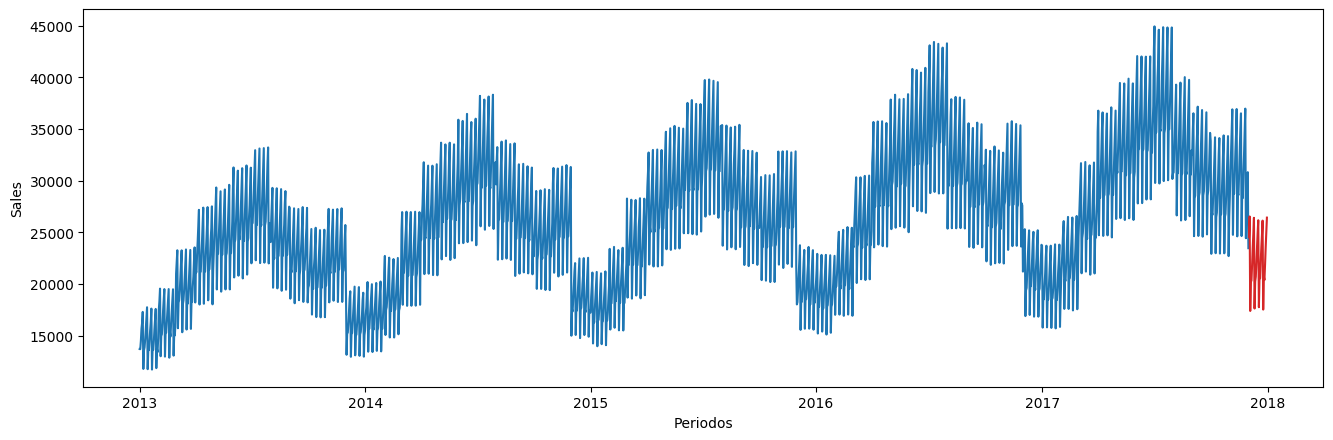

In [169]:
# Graficamos los periodos train y test
plt.figure(figsize=(16,5), dpi=100)
plt.plot(pd.DataFrame(y_train).index, pd.DataFrame(y_train).sales,color='tab:blue')
plt.plot(pd.DataFrame(y_test).index, pd.DataFrame(y_test).sales,color='tab:red')
plt.xlabel('Periodos')
plt.ylabel('Sales')
plt.show()

In [170]:
model_auto2 = pm.auto_arima(y_train, seasonal=True, m=7)

In [171]:
results2 = model_auto2.fit(y_train)

In [172]:
forecast_autoarima2 = model_auto2.predict(n_periods=30)
forecast_autoarima2

array([26888.03493998, 28779.92201069, 16663.18373639, 20826.50003719,
       20776.56019854, 22987.4753057 , 21439.08768093, 24054.21870436,
       25943.77370753, 13841.97134167, 18000.15565813, 17950.27737869,
       20158.46716284, 18611.98818504, 21223.89562167, 23111.12143196,
       11024.23656354, 15177.29522169, 15127.47842558, 17332.94624614,
       15788.37356258, 18397.06138602, 20281.96087455,  8209.97511526,
       12357.91443332, 12308.15904476, 14510.908257  , 12968.23951786,
       15573.71169683, 17456.28773117])

In [173]:
print(results2.summary())

SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                 1796
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 7)   Log Likelihood              -14589.635
Date:                           Wed, 09 Sep 2020   AIC                          29187.271
Time:                                   23:03:27   BIC                          29209.242
Sample:                                        0   HQIC                         29195.382
                                          - 1796                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.1390      0.021     -6.774      0.000      -0.179      -0.099
ar.S.L7        0.9988      0.001   1811.337      0.000       0.998       1.000
m

In [174]:
forecast_autoarima2 = pd.DataFrame(forecast_autoarima2)
forecast_autoarima2.index = y_test.index
forecast_autoarima2.columns = ['forecast']
forecast_autoarima2.head()

,forecast
date,
2017-12-02,26888.034940
2017-12-03,28779.922011
2017-12-04,16663.183736
2017-12-05,20826.500037
2017-12-06,20776.560199


<Figure size 1600x500 with 0 Axes>

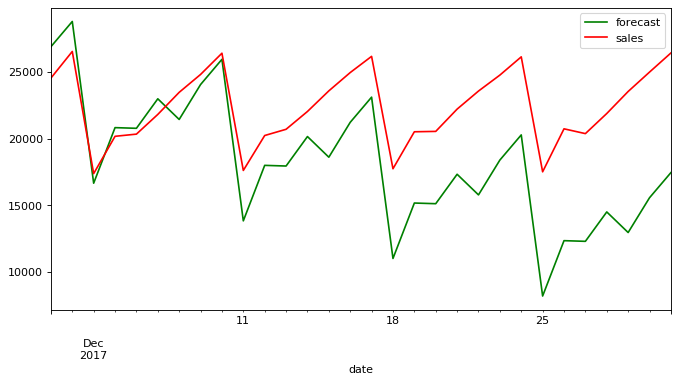

In [175]:
plt.figure(figsize=(16,5), dpi=100)
forecast_autoarima2.plot(color = 'green', legend = True)
y_test.plot(color='red',legend = True)
plt.show()

In [176]:
# model sarimax
model_sarimax2 = SARIMAX(df_diario.sales, order= (0,1,1), seasonal_order=(1,0,1,7),
                       enforce_stationarity=False,
                      enforce_invertibility=False)

In [177]:
results_sarimax2 = model_sarimax2.fit()


In [178]:
# Pronósticos de las ventas diarias totales
forecast_sarimax2 = results_sarimax2.get_forecast(steps = 31).predicted_mean.rename('forecast sarimax')
forecast_sarimax2

2018-01-01    17174.154292
2018-01-02    20323.309265
2018-01-03    20282.651209
2018-01-04    21920.083307
2018-01-05    22944.144524
2018-01-06    24369.460597
2018-01-07    25854.696145
2018-01-08    16612.290476
2018-01-09    19758.460756
2018-01-10    19717.841235
2018-01-11    21353.721414
2018-01-12    22376.812050
2018-01-13    23800.777244
2018-01-14    25284.605121
2018-01-15    16050.959181
2018-01-16    19194.147597
2018-01-17    19153.566573
2018-01-18    20787.896305
2018-01-19    21810.017281
2018-01-20    23232.632874
2018-01-21    24715.054415
2018-01-22    15490.159902
2018-01-23    18630.369280
2018-01-24    18589.826718
2018-01-25    20222.607472
2018-01-26    21243.759705
2018-01-27    22665.026978
2018-01-28    24146.043516
2018-01-29    14929.892136
2018-01-30    18067.125298
2018-01-31    18026.621162
Freq: D, Name: forecast sarimax, dtype: float64

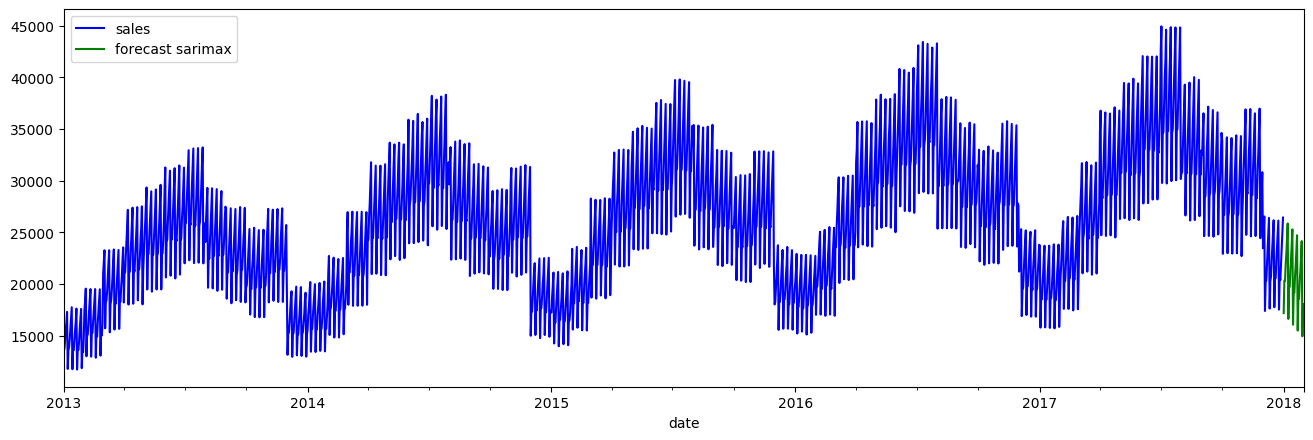

In [179]:
history2 = df_diario.sales
plt.figure(figsize=(16,5), dpi=100)
history2.plot(color = 'blue', legend = True)
forecast_sarimax2.plot(color = 'green', legend = True)
plt.show()